# 0 Domande di ricerca

- Ci sono differenze nel sentiment tra diversi gruppi di utenti, ad esempio, in base alla posizione geografica?

# 1 Pulizia del dataset del dataset

In [33]:
source("../RuntimEnviroment/my_function.R")

Funzioni caricate con successo

In [41]:
# Leggo il file CSV
df <- read.csv("../Dataset/Sentiment_en_tweet_2023_new_location.csv", header = TRUE)

# Visualizzo la struttura del dataset
str(df)

'data.frame':	28416 obs. of  34 variables:
 $ userid                 : num  9.37e+17 1.61e+09 1.09e+18 5.49e+08 7.96e+17 ...
 $ username               : chr  "alliance_climat" "mdresch2" "alanastarisborn" "hussamalnhar" ...
 $ acctdesc               : chr  "Alliance de plus de 140 organisations pour une politique climatique responsable (DE @KlimaAllianzCH, EN @climal"| __truncated__ "I've lived through the crooks Nixon, Ford, Reagan, Bush, Bush, and now the infant horrific Trump and never vote"| __truncated__ "A 'CRAP ANIME PRODUCTION' IN ASSOCIATION WITH 'I CAN'T BELIEVE I'M WATCHING THIS' & 'MADE ON MY PHONE MOVIES' c"| __truncated__ "Journalist, Researcher, human rights,  former political prisoner\n,freedom 4 Syria, Slava Ukraine,\nFools are h"| __truncated__ ...
 $ following              : int  697 1865 217 1205 3144 3228 1663 313 56 718 ...
 $ followers              : int  1199 609 292 302 4525 224 900 157 324 377 ...
 $ totaltweets            : int  1302 101613 99882 3947 173255 

## 1.1 Rimozione degli elementi 'unknown'

In [42]:
library(dplyr)

df_clean <- df %>% filter(nations_from != "unknown")

print(head(df_clean))

        userid        username
1 9.366288e+17 alliance_climat
2 5.488151e+08    hussamalnhar
3 1.422845e+18      thee_prof1
4 8.409499e+17        FOREF_EU
5 4.196158e+08 MargaretTelford
6 7.585973e+17   SydorenkoKate
                                                                                                                                                                                                                                                                                         acctdesc
1                                                                                                                                                   Alliance de plus de 140 organisations pour une politique climatique responsable (DE @KlimaAllianzCH, EN @climalliancech IT: @AlleanzaClimaCH)
2                                                                                                                               Journalist, Researcher, human rights,  former political prisoner\n,freedom 

## 1.2 Numerare i sentiment

In [46]:
library(dplyr)

# Trasformo la variabile sentiment in numerica in base al valore qualitativo
df_clean <- df_clean %>%
  mutate(sentiment_numeric = case_when(
    sentiment == "pos" ~ 1,
    sentiment == "neu" ~ 0,
    sentiment == "neg" ~ -1,
    TRUE ~ NA_real_  # Assegna NA se non corrisponde a nessuna categoria
  ))

# Sommo il sentiment numerico con lo score per ottenere il valore finale
df_clean <- df_clean %>%
  mutate(sentiment_score = sentiment_numeric + score)

# Verifico i risultati
head(df_clean)


,userid,username,acctdesc,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,...,extractedts,sentiment,score,nations_from,lat,lon,iso3,iso_country,sentiment_numeric,sentiment_score
,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,9.366288e+17,alliance_climat,"Alliance de plus de 140 organisations pour une politique climatique responsable (DE @KlimaAllianzCH, EN @climalliancech IT: @AlleanzaClimaCH)",697,1199,1302,2017-12-01 16:11:17,1.630164e+18,2023-02-27 11:13:02,11,...,2023-02-27 11:59:54.521928,neg,0.4546031,germany,50.72724,12.48839,deu,DE,-1,-0.5453969
2,5.488151e+08,hussamalnhar,"Journalist, Researcher, human rights, former political prisoner ,freedom 4 Syria, Slava Ukraine, Fools are hard to free from the chains they revere. -Voltaire",1205,302,3947,2012-04-09 00:21:09,1.631551e+18,2023-03-03 07:03:32,0,...,2023-03-03 09:52:23.114677,neu,0.6580944,syria,33.96921,36.65729,syr,SY,0,0.6580944
3,1.422845e+18,thee_prof1,ð‡ðŽðŒð„ð–ðŽð‘ðŠ || ð€ð’ð’ðˆð†ððŒð„ðð“ð’ || ðŽðð‹ðˆðð„ ð‚ð‹ð€ð’ð’ & ð„ð—ð€ðŒ ð‡ð„ð‹ð || ð–ð¡ðšð­ð¬ð€ð©ð© +ðŸ(ðŸ’ðŸðŸ’)ðŸ‘ðŸ•ðŸ•-ðŸŽðŸ–ðŸ“ðŸ“ ð™¿ð™°ðšˆð™¿ð™°ð™» Accepted,3228,224,33427,2021-08-04 09:02:13,1.630402e+18,2023-02-28 02:56:37,0,...,2023-02-28 03:10:58.236503,neu,0.7431343,spain,37.11906,-3.58400,esp,ES,0,0.7431343
4,8.409499e+17,FOREF_EU,"FOREF is a international, secular & indÃ©pendant Human Rights Organisation based in Vienna, Austria",1663,900,5084,2017-03-12 15:37:37,1.631637e+18,2023-03-03 12:44:30,0,...,2023-03-03 15:10:39.207599,neg,0.8682001,belgium,51.21979,4.32664,bel,BE,-1,-0.1317999
5,4.196158e+08,MargaretTelford,"I hate being lied to, and stand by the people of Donbass.",313,157,4090,2011-11-23 15:34:02,1.629956e+18,2023-02-26 21:24:33,68,...,2023-02-27 00:20:21.726096,neg,0.5788718,poland,52.04880,20.44599,pol,PL,-1,-0.4211282
6,7.585973e+17,SydorenkoKate,PhD in economics,718,377,12067,2016-07-28 09:37:36,1.631390e+18,2023-03-02 20:24:31,334,...,2023-03-02 20:50:25.937245,neg,0.5990034,ukraine,50.58518,34.48490,ukr,UA,-1,-0.4009966


# 2 Ipotesi di normalità

## 2.1 Raggruppamento tweet per nazione

In [52]:
library(dplyr)

# Raggruppo i dati per nazione e calcola la media, deviazione standard e il numero di osservazioni
df_grouped <- df_clean %>%
  group_by(nations_from) %>%
  summarise(mean_sentiment = mean(sentiment_score, na.rm = TRUE),
            sd_sentiment = sd(sentiment_score, na.rm = TRUE),
            count = n())

print(head(df_grouped))

# A tibble: 6 x 4
  nations_from   mean_sentiment sd_sentiment count
  <chr>                   <dbl>        <dbl> <int>
1 afghanistan            0.392         0.854     4
2 albania                0.265         0.670    20
3 algeria                0.310         0.655    22
4 american samoa         0.158         0.552    33
5 andorra                0.397        NA         1
6 angola                 0.0977        0.537    10


## 2.2 Effettuo il test

In [55]:
library(dplyr)
library(nortest)

# Filtro i gruppi con almeno 8 osservazioni
df_clean_filtered <- df_clean %>%
  group_by(nations_from) %>%
  filter(n() >= 8)

# Verifica della normalità del sentiment_score con il test di Anderson-Darling per gruppi filtrati
normality_test <- df_clean_filtered %>%
  group_by(nations_from) %>%
  summarise(ad_p_value = ad.test(sentiment_score)$p.value)

# Visualizzo i risultati finali
normality_test


nations_from,ad_p_value
<chr>,<dbl>
albania,9.005522e-03
algeria,1.956669e-02
american samoa,4.985139e-04
angola,1.055380e-02
argentina,1.392003e-23
armenia,7.241187e-03
australia,3.700000e-24
austria,3.342453e-11
azerbaijan,2.901627e-04


### 2.2.1 Suddivido i gruppi che seguono una distribuzione normale da altri

In [58]:
# Suddivido i gruppi in quelli che superano il test (p-value > 0.05) e quelli che non lo superano (p-value <= 0.05)
normal_groups <- normality_test %>%
  filter(ad_p_value > 0.05)

non_normal_groups <- normality_test %>%
  filter(ad_p_value <= 0.05)

# Visualizzo i gruppi che hanno superato il test
print("Gruppi che superano il test di normalità (p-value > 0.05):")
print(normal_groups)

# Visualizzo i gruppi che non hanno superato il test
print("Gruppi che non superano il test di normalità (p-value <= 0.05):")
print(non_normal_groups)

[1] "Gruppi che superano il test di normalità (p-value > 0.05):"
# A tibble: 11 x 2
   nations_from             ad_p_value
   <chr>                         <dbl>
 1 central african republic     0.227 
 2 congo kinshasa               0.169 
 3 cook islands                 0.117 
 4 cuba                         0.0794
 5 faroe islands                0.131 
 6 hungary                      0.0599
 7 laos                         0.0576
 8 malta                        0.185 
 9 sri lanka                    0.126 
10 tunisia                      0.525 
11 yemen                        0.116 
[1] "Gruppi che non superano il test di normalità (p-value <= 0.05):"
# A tibble: 111 x 2
   nations_from   ad_p_value
   <chr>               <dbl>
 1 albania          9.01e- 3
 2 algeria          1.96e- 2
 3 american samoa   4.99e- 4
 4 angola           1.06e- 2
 5 argentina        1.39e-23
 6 armenia          7.24e- 3
 7 australia        3.7 e-24
 8 austria          3.34e-11
 9 azerbaijan       2.90e- 4


In [59]:
# Filtro df_clean_filtered per selezionare solo le nazioni presenti in normal_groups
df_clean_filtered_norm <- df_clean_filtered %>%
  filter(nations_from %in% normal_groups$nations_from)

# Filtro df_clean_filtered per selezionare solo le nazioni presenti in normal_groups
df_clean_filtered_no_norm <- df_clean_filtered %>%
  filter(nations_from %in% non_normal_groups$nations_from)

Conclusioni:

- alcune nazioni si adattano alla distribuzione normale mentre altre no (se il p-value ha un valore maggiore di 0,05) allora si adegua altrimenti no

# 3 test di Kruskal-Wallis

I dati non seguono tutti una distribuzione normale, quindi per alcuni si usa un altro test

Ipotesi del test:
- Ipotesi nulla (H0): Le distribuzioni dei gruppi sono identiche (non c'è differenza significativa tra i gruppi).
- Ipotesi alternativa (H1): Almeno una delle distribuzioni è significativamente diversa da quelle delle altre (esiste una differenza tra i gruppi).

In [61]:
# Eseguo il test di Kruskal-Wallis per confrontare il sentiment_score tra le nazioni
kruskal_test <- kruskal.test(sentiment_score ~ nations_from, data = df_clean_filtered_no_norm)

# Visualizzo i risultati del test
print(kruskal_test)


	Kruskal-Wallis rank sum test

data:  sentiment_score by nations_from
Kruskal-Wallis chi-squared = 171.15, df = 110, p-value = 0.0001704



Il test comunica che ci sono differenze sostanziali tra i vari sentiment nelle nazioni

# 4 Test di ANOVA

Utilizzato per i gruppi che seguono una distribuzione normale

Ipotesi del test:
- Ipotesi nulla (H0): Le distribuzioni dei gruppi sono identiche (non c'è differenza significativa tra i gruppi).
- Ipotesi alternativa (H1): Almeno una delle distribuzioni è significativamente diversa da quelle delle altre (esiste una differenza tra i gruppi).

In [63]:
# Eseguo il test ANOVA per confrontare il sentiment_score tra le nazioni
anova_test <- aov(sentiment_score ~ nations_from, data = df_clean_filtered_norm)

# Visualizzo i risultati del test ANOVA
summary(anova_test)

              Df Sum Sq Mean Sq F value Pr(>F)
nations_from  10   5.54  0.5536   1.116  0.356
Residuals    118  58.53  0.4960               

Il p-value corrisonde a 0.356, quindi possiamo conlcudere che l'ipotesi nulla non viene scartata. 

Le medie delle variabili sentiment_score tra le diverse nazioni sono statisticamente simili. Non ci sono differenze significative tra i gruppi (nazioni) in termini di sentiment_score.

## 5 Stampa delle nazioni statisticamente simili

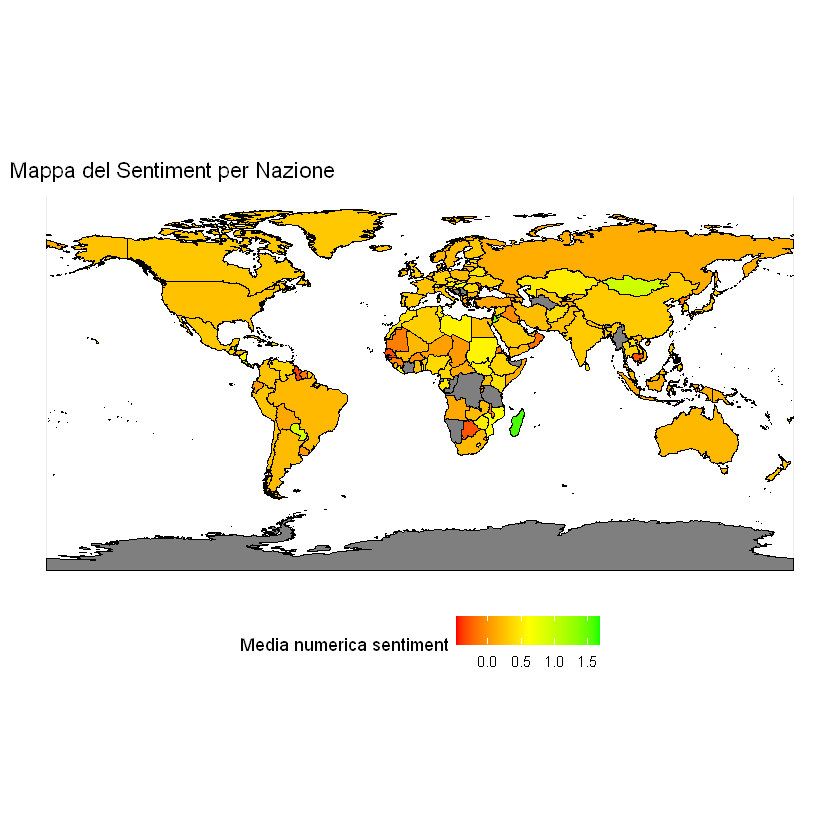

In [79]:
library(dplyr)
library(ggplot2)
library(rnaturalearth)
library(sf)

# Carico la mappa del mondo con tutte le nazioni
world_map <- ne_countries(scale = "medium", returnclass = "sf")

# Modifico la colonna 'sovereignt' in minuscolo per standardizzare
world_map <- world_map %>%
  mutate(sovereignt = tolower(sovereignt))

# Verifico i nomi dei paesi nel df_grouped (devono essere in minuscolo)
df_grouped <- df_grouped %>%
  mutate(nations_from = tolower(nations_from))

# Correzione per alcune nazioni che potrebbero avere errori di battitura
df_grouped <- df_grouped %>%
  mutate(nations_from = case_when(
    nations_from == "united states" ~ "united states of america",
    nations_from == "uk" ~ "united kingdom",
    nations_from == "congo - kinshasa" ~ "Democratic Republic of the Congo",
    nations_from == "congo - brazzaville" ~ "Republic of the Congo",
    TRUE ~ nations_from
  ))

# Unisco i dati
df_map <- world_map %>%
  left_join(df_grouped, by = c("sovereignt" = "nations_from"))

# Trovo il range effettivo di mean_sentiment
sentiment_range <- range(df_map$mean_sentiment, na.rm = TRUE)

# Plot con colori distinti per migliorare la visibilità
ggplot(df_map) +
  geom_sf(aes(fill = mean_sentiment), color = "black") +
  scale_fill_gradientn(colors = c("red", "yellow", "green"), 
                       values = c(0, 0.5, 1),  # Imposta i valori per la gradazione
                       limits = sentiment_range) +  # Usa il range effettivo dei dati
  theme_minimal() +
  theme(legend.position = "bottom") +
  labs(title = "Mappa del Sentiment per Nazione",
       fill = "Media numerica sentiment")


# 6 sentiment dei tweet più virali

In [81]:
install.packages("ggraph")

si installa anche la dipendenza 'cpp11'





  Ci sono versioni binarie disponibile, ma le versioni con le sorgenti
  sono successive:
       binary source needs_compilation
cpp11   0.4.3  0.5.1             FALSE
igraph  1.4.2  2.1.2              TRUE

  Binaries will be installed
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\smike18\AppData\Local\Temp\Rtmpu4W9pW\downloaded_packages


installazione pacchetto sorgenti 'cpp11'


si installano anche le dipendenze 'scales', 'tweenr', 'polyclip', 'gridExtra', 'igraph', 'ggplot2', 'ggforce', 'ggrepel', 'viridis', 'tidygraph', 'graphlayouts'





  Ci sono versioni binarie disponibile, ma le versioni con le sorgenti
  sono successive:
             binary source needs_compilation
scales        1.2.1  1.3.0              TRUE
tweenr        2.0.2  2.0.3              TRUE
polyclip     1.10-4 1.10-7              TRUE
igraph        1.4.2  2.1.2              TRUE
ggplot2       3.4.2  3.5.1             FALSE
ggforce       0.4.1  0.4.2              TRUE
ggrepel       0.9.3  0.9.6              TRUE
viridis       0.6.2  0.6.5             FALSE
tidygraph     1.2.3  1.3.1              TRUE
graphlayouts  0.8.4  1.2.1              TRUE
ggraph        2.1.0  2.2.1              TRUE

  Binaries will be installed
package 'scales' successfully unpacked and MD5 sums checked
package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unp

installazione pacchetti sorgenti 'ggplot2', 'viridis'


Warning message in install.packages("ggraph"):
"installation of package 'ggplot2' had non-zero exit status"


In [95]:
remove.packages("igraph")

Rimozione del pacchetto da 'C:/Users/smike18/anaconda3/envs/r-python-env/Lib/R/library'
(come 'lib' non è specificato)



## 6.1 Estraggo solo i tweet con più retweet

In [103]:
library(dplyr)

# Calcolo della metrica di influenza
df_influential <- df %>%
  mutate(influence_score = retweetcount + favorite_count) %>%  # Somma retweet e preferiti
  arrange(desc(influence_score)) %>%  # Ordina in ordine decrescente per la metrica di influenza
  head(20)  # Prendi i primi 20 tweet

# Visualizzo i tweet più influenti
df_influential %>%
  dplyr::select(username, text, retweetcount, favorite_count, influence_score, sentiment, score)


,username,text,retweetcount,favorite_count,influence_score,sentiment,score
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,SlothropBerlin,".@ZelenskyyUa's tv address to the Russian (!) people might be the most moving speech that I've ever seen in my entire life. The whole world needs to see, understand and share this crucial Ukrainian message. #StandWithUkraine #Ukraine #Ð£ÐºÑ€Ð°Ñ—Ð½Ð° #Russia #Ð Ð¾ÑÑÐ¸Ñ https://t.co/WoMOgqXTWX",138027,0,138027,pos,0.6426150
2,covalyovavv,"Russians kill peaceful Ukrainians everyday, russians torture our soldiers in captivity, russians ruin our cities with bombs. Do not expect them to stop, they wonâ€™t. Instead help us with weapons, ask your governments to arm Ukraine. We need them right now! #RussiaIsATerroristState https://t.co/Xdr1LVm9C5",20729,0,20729,neg,0.9215782
3,Sabine200317,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",12196,0,12196,neg,0.8722999
4,JasonRuderman,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",12190,0,12190,neg,0.8722999
5,swlo1672,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",12111,0,12111,neg,0.8722999
6,mcmaiola,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",12081,0,12081,neg,0.8722999
7,Nadja72638243,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",12005,0,12005,neg,0.8722999
8,Bonnology,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",11999,0,11999,neg,0.8722999
9,greatlifepsych,"Russia is isolated. Completely. Irreversibly. During todayâ€™ OSCE PC meeting, when Russian propagandist (they still call them â€˜diplomatsâ€™ to gain some credibility) started reading his statement, the mtg room was emptied immediately. Everyone stands with Ukraine! #UkraineWillWin https://t.co/hr4n6vjxZP",11999,0,11999,neg,0.8722999
